In [1]:
from cat_cnn_component.cat_train import model_train
from cat_cnn_component.cat_preprocessing import data_preprocessing, set_label
from cat_cnn_component.cat_evaluate import model_evaluate
from cat_cnn_component.cat_serve import model_serving
import tensorflow as tf

In [2]:
LR = 0.001

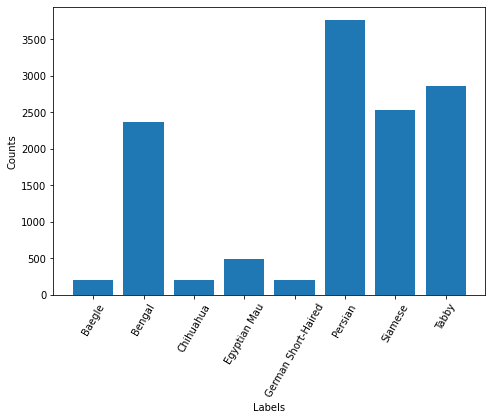

In [3]:
data_preprocessing()
label = set_label()

In [4]:
model = model_train(label, LR)

Found 12058 files belonging to 5 classes.
Using 9647 files for training.
150/150 - 80s - loss: 1.4022 - accuracy: 0.7089


In [5]:
result = model_evaluate(model, label)
accuracy = result[1]
auc_roc = result[2]
f1_score = sum(result[3])/len(result[3])

Found 12058 files belonging to 5 classes.
Using 2411 files for validation.
242/242 - 56s - loss: 0.8692 - accuracy: 0.7789 - auc: 0.9378 - f1_score: 0.7215


In [8]:
kfserving = model_serving(model)
kfserving

[INFO]:tensorflow:Assets written to: /home/jovyan/saved_model_tmp/assets


2022-04-12 05:28:17 Kale serveutils:217       [INFO]     Starting serve procedure for model '<tensorflow.python.keras.engine.sequential.Sequential object at 0x7f700286dcf8>'
2022-04-12 05:28:17 Kale podutils:84          [INFO]     Getting the current container name...
2022-04-12 05:28:17 Kale podutils:90          [INFO]     Using NB_PREFIX env var '/notebook/kubeflow-user/cat2'. Container name: 'cat2'
2022-04-12 05:28:17 Kale serveutils:242       [INFO]     Model is contained in volume 'workspace-cat2-xham3o5z6'
2022-04-12 05:28:17 Kale marshalling          [INFO]     Saving tensorflow object using Tensorflow backend: model


[INFO]:tensorflow:Assets written to: /home/jovyan/.kale.kfserving.model.dir/model.tfkeras/1/assets


2022-04-12 05:28:54 Kale serveutils:247       [INFO]     Model saved successfully at '/home/jovyan/.kale.kfserving.model.dir/model.tfkeras'
2022-04-12 05:28:54 Kale rokutils:59          [INFO]     Taking a snapshot of PVC workspace-cat2-xham3o5z6 in namespace kubeflow-user ...
2022-04-12 05:28:54 Kale rokutils:265         [INFO]     Creating Rok bucket 'serving'...
2022-04-12 05:28:54 Kale rokutils:275         [INFO]     Rok bucket 'serving' already exists
2022-04-12 05:29:05 Kale rokutils:78          [INFO]     Successfully took Rok snapshot
2022-04-12 05:29:05 Kale rokutils:225         [INFO]     Creating new PVC 'cat-detect-pvc-rvw4z' from Rok version ffb43dd1-be49-4ff3-ad0a-cf09f5cb8acb ...
2022-04-12 05:29:05 Kale rokutils:237         [INFO]     Using Rok url: http://rok.rok.svc.cluster.local/swift/v1/kubeflow-user/serving/workspace-cat2-xham3o5z6?version=ffb43dd1-be49-4ff3-ad0a-cf09f5cb8acb
2022-04-12 05:29:05 Kale rokutils:259         [INFO]     Successfully submitted PVC.
2022-

In [8]:
print(accuracy)
print(auc_roc)
print(f1_score)

0.7789298892021179
0.9378215074539185
0.7214836537837982
